In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la Información - Tarea 9
Elaborada por: __Andrés Urbano Guillermo Gerardo__


## Descripción

Explorar la Base de Datos Global de Plantas de Energía para Puerto Rico, usando eldataset gppd\_120\_pr.csv el cual consta de todas las plantas de energía que pertenecen a Puerto Rico, un territorio no incorporado de los Estados Unidos ubicado en el noreste del Mar Caribe. 

Leemos nuestro conjunto de datos:

In [37]:
df = pd.read_csv("gppd_120_pr.csv")
df.tail()

,system:index,capacity_mw,commissioning_year,country,country_long,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,other_fuel1,other_fuel2,other_fuel3,owner,primary_fuel,source,url,wepp_id,year_of_capacity_data,.geo
30,00000000000000004348,864.000000,2009.0,USA,United States of America,4826.129585,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/sanjuan.asp,30947.0,0,"{""type"":""Point"",""coordinates"":[-66.10450095444..."
31,00000000000000004106,23.400000,2011.0,USA,United States of America,4.151337,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Sovereign Bank,Wind,Gestamp Wind,http://www.gestampwind.com/en/business/innovat...,64313.0,0,"{""type"":""Point"",""coordinates"":[-65.69480320875..."
32,00000000000000003a3d,26.000000,2012.0,USA,United States of America,11.594119,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Uriel Renewables and Coqui Power,Solar,Clean Technica,http://www.eosolenergy.com/proyectos.html,NaN,0,"{""type"":""Point"",""coordinates"":[-65.90280243648..."
33,00000000000000004368,101.199997,2012.0,USA,United States of America,17.953645,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Pattern Energy,Wind,Pattern Energy,http://patternenergy.com/en/operations/facilit...,NaN,0,"{""type"":""Point"",""coordinates"":[-66.39800344487..."
34,00000000000000003ee1,57.650002,2015.0,USA,United States of America,25.707730,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Sonnedix,Solar,Sonnedix,http://www.sonnedix.com/news/sonnedix-and-yaro...,NaN,0,"{""type"":""Point"",""coordinates"":[-67.04429663336..."


Tenenemos un conjunto de datos que  consta de todas las plantas de energía que pertenecen a Puerto Rico, un territorio no incorporado de los Estados Unidos ubicado en el noreste del Mar Caribe.

In [38]:
print("Atributos del dataset:\n{}".format(df.columns))

Atributos del dataset:
Index(['system:index', 'capacity_mw', 'commissioning_year', 'country',
       'country_long', 'estimated_generation_gwh', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'geolocation_source', 'gppd_idnr', 'name',
       'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'primary_fuel',
       'source', 'url', 'wepp_id', 'year_of_capacity_data', '.geo'],
      dtype='object')


## Actividad 1
Elabore una gráfica de barras donde indique los tipos de Centrales Eléctricas en función del
Combustible primario utilizado, es decir, en función del combustible principal utilizado
(primary_fuel).

Text(0.5, 1.0, 'Histograma de Tipos de Centrales Eléctricas')

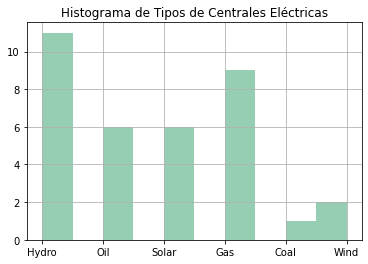

In [39]:
df.primary_fuel.hist(color=['#96CEB4']);
plt.title("Histograma de Tipos de Centrales Eléctricas")

Vemos que las principales centrales de combustible en Puerto Rico son de energías Hidráulicas seguido  de Gas. Además vemos que contiene al menos una de cada tipo.

- ¿Cuántos años tienen las plantas de energía?

Las centrales eléctricas construidas hace décadas tienden a contaminar más ya que no cumplen con
los nuevos requisitos anticontaminación. Observe que muchas centrales eléctricas no tienen su fecha
de puesta en marcha. Para ello utilice (commissioning_year).

In [40]:
print('Años:\n{}'.format(np.unique(df.commissioning_year)))

Años:
[   0. 1915. 1929. 1937. 1941. 1942. 1960. 1962. 1975. 2009. 2011. 2012.
 2015.]


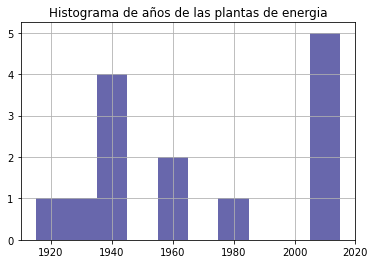

In [41]:
only_years = df[df.commissioning_year != 0.0].commissioning_year
only_years.hist(color=['#6867AC'])
plt.title("Histograma de años de las plantas de energia");

Vemos que existen dos tendencia en los diferentes años, por una parte tenemos una mayor cantidad de plantas recientes que estan por encima del año 2000 por lo que cumple con los requisitos de anticontaminación, y segunda lugar tenemos plantas del año de 1940 que posible no cumplen con los requisitos más nuevos.

- De acuerdo con la información observada en el dataset, ¿De dónde provienen la mayoría de los datos? (CEPR, PREPA, Sonnedix, Clean Technica, PV Tech, Fluor, TSK, etc.) Para ello utilice (source) y puede elaborar una gráfica de su elección para responder.

¿Quién es el propietario (owner) de las centrales eléctricas?
Elabore una gráfica de barras horizontal para dar su respuesta.

In [42]:
all_sources = df.source.value_counts()
df_all_sources = pd.DataFrame(dict(source=all_sources.index.values, 
                                   total=all_sources.values))
df_all_sources

,source,total
0,CEPR,14
1,PREPA,9
2,PREPA; CEPR,3
3,Sonnedix,2
4,TSK,1
5,PV Tech,1
6,Fluor; PREPA,1
7,Windmar Renewable Energy,1
8,Gestamp Wind,1
9,Clean Technica,1


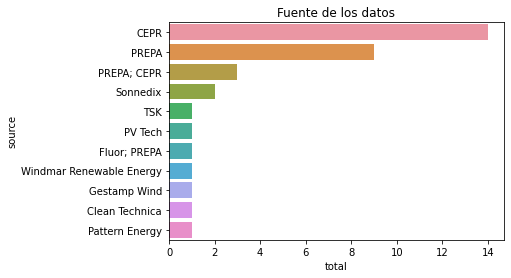

In [43]:
sns.barplot(data=df_all_sources, x="total", y="source").set_title("Fuente de los datos");

En este histograma de barras horizontales deseamos mostrar De de dónde provienen la mayoría de los datos, es decir su fuente. Vemos que la mayoria de los datos provienen del Centro de Investigación Económica y Política (CEPR) seguido de PREPA - Puerto Rico Electric Power Authority.

## Actividad 2

Mencione cuál es la Capacidad Total Instalada (capacity_mw).

La capacidad instalada total de una planta de energía se refiere a la producción máxima de
electricidad que puede producir en condiciones ideales, pero esta no será necesariamente la cantidad
real de electricidad producida. Por lo general, se expresa en Megavatios (MW).

- Elabore una gráfica de su elección que muestre la Capacidad total de todas las plantas (Oil, Gas, Coal, Solar, Wind, Hydro) y el porcentaje del total que representan.

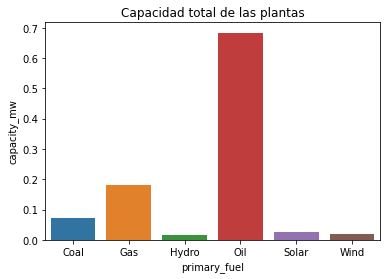

In [44]:
all_plants = df[['primary_fuel', 'capacity_mw']]
all_plants_total = all_plants.groupby(["primary_fuel"]).sum()
gwh_total = np.sum(all_plants_total['capacity_mw'])
all_plants_total['capacity_mw'] = all_plants_total['capacity_mw'] / gwh_total
all_plants_total['primary_fuel'] = all_plants_total.index.values
sns.barplot(data=all_plants_total, x="primary_fuel",
            y="capacity_mw").set_title("Capacidad total de las plantas");

Vemos en el histograma que la mayor capacidad total es la energía del petroleo con una gran diferentes con las demas energías.

- ¿Cuál es la Generación estimada (estimated_generation_gwh) de todas las plantas? 

La generación de electricidad, por otro lado, se refiere a la cantidad de electricidad que se produce durante un período de tiempo específico. Este suele medirse en Kilovatios-hora, Megavatios-hora o Gigavatios-hora.

Elabore una gráfica de su preferencia que muestre la Generación estimada total de todas las
plantas (Oil, Gas, Coal, Solar, Wind, Hydro) y el porcentaje del total que representan.

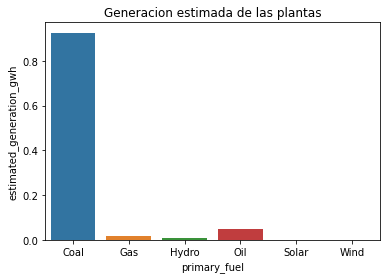

In [45]:
all_plants = df[['primary_fuel', 'estimated_generation_gwh']]
all_plants_total = all_plants.groupby(["primary_fuel"]).sum()
gwh_total = np.sum(all_plants_total['estimated_generation_gwh'])
all_plants_total['estimated_generation_gwh'] = all_plants_total['estimated_generation_gwh'] / gwh_total
all_plants_total['primary_fuel'] = all_plants_total.index.values
sns.barplot(data=all_plants_total, x="primary_fuel",
            y="estimated_generation_gwh").set_title("Generacion estimada de las plantas");

De acuerdo con su gráfica, qué puede decir sobre la generación estimada que proviene de plantas
alimentadas con combustibles fósiles (carbón).

Por ultimo, hacemos un histograma que nos indique generación de electricidad de cada tipo. Observamos que la mayor cantidad generada es producida por las plantas alimentadas con combustibles fósiles (carbón) con una gran porcentaje del 94\%.

## Resources

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
- https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html
- https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot